In [ ]:
# Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
# Dataset
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images/255.0
test_images  = test_images/255.0

print(train_images.shape)
print(test_images.shape)

170498071/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# One-hot
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# VGG16 model
model = Sequential()
model.add(Convolution2D(64, 3, padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Convolution2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

'''
model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
'''

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [ ]:
# Training
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_data = model.fit(train_images, train_labels, 
                         validation_data=(test_images, test_labels), 
                         batch_size=512, epochs=20, verbose=2)

Epoch 1/20
98/98 - 19s - loss: 1.6563 - accuracy: 0.4028 - val_loss: 1.3146 - val_accuracy: 0.5297 - 19s/epoch - 192ms/step
Epoch 2/20
98/98 - 7s - loss: 1.1549 - accuracy: 0.5933 - val_loss: 1.0593 - val_accuracy: 0.6271 - 7s/epoch - 74ms/step
Epoch 3/20
98/98 - 7s - loss: 0.9135 - accuracy: 0.6787 - val_loss: 0.8869 - val_accuracy: 0.6939 - 7s/epoch - 75ms/step
Epoch 4/20
98/98 - 7s - loss: 0.7488 - accuracy: 0.7400 - val_loss: 0.8214 - val_accuracy: 0.7207 - 7s/epoch - 75ms/step
Epoch 5/20
98/98 - 7s - loss: 0.6259 - accuracy: 0.7828 - val_loss: 0.7866 - val_accuracy: 0.7319 - 7s/epoch - 75ms/step
Epoch 6/20
98/98 - 7s - loss: 0.5041 - accuracy: 0.8258 - val_loss: 0.7645 - val_accuracy: 0.7464 - 7s/epoch - 76ms/step
Epoch 7/20
98/98 - 7s - loss: 0.3944 - accuracy: 0.8642 - val_loss: 0.7550 - val_accuracy: 0.7630 - 7s/epoch - 76ms/step
Epoch 8/20
98/98 - 8s - loss: 0.2766 - accuracy: 0.9062 - val_loss: 0.8449 - val_accuracy: 0.7508 - 8s/epoch - 77ms/step
Epoch 9/20
98/98 - 8s - loss:

In [ ]:
# Testing
score = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

Test loss: 1.6893
Test accuracy: 0.7568


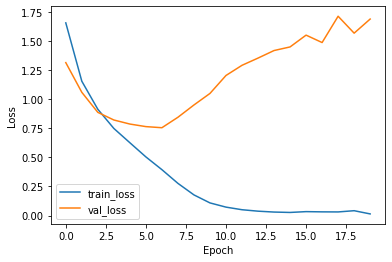

In [ ]:
# Loss
plt.plot(history_data.history['loss'], label = "train_loss")
plt.plot(history_data.history['val_loss'], label = "val_loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

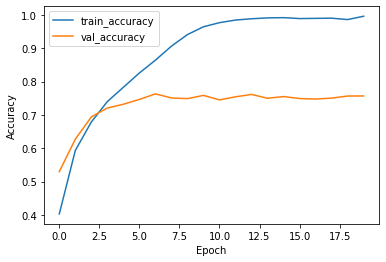

In [ ]:
# Accuracy
plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.plot(history_data.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()